# Compare across conditions (from Shays Fig4_0)

In [1]:
import sys
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
record = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/mike_session_record.csv',index_col=0)

5


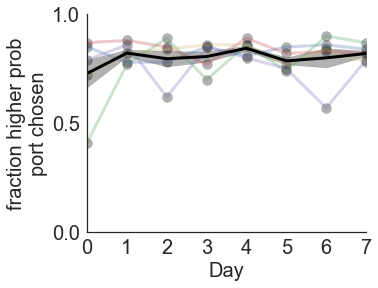

In [4]:
mice = ['SOM45','SOM44','PV30','SOM41','SOM42']
mice = np.unique(record['Mouse ID'].values)
mice = np.delete(mice,np.where(mice=='PV25'))
mice = np.delete(mice,np.where(mice=='PV27'))
mice = np.delete(mice,np.where(mice=='PV29'))
mice = np.delete(mice,np.where(mice=='SOM39'))

print(mice.shape[0])
sns.set_style('white')
plt.figure(figsize=(5,4))
y = np.zeros((mice.shape[0],10))
x = np.arange(0,10)
k = 0 
for i,mouse in enumerate(mice):
    y_temp = record[((record['Mouse ID'] == mouse) & ((record['Left Reward Prob'] == 0.9) | (record['Left Reward Prob'] == 0.1)))]['p(high Port)'].values
    try:
        y[k,:] = y_temp[-10:]
        plt.plot(x,y[k,:],label=mouse,alpha=0.3,linewidth=3)
        plt.scatter(x,y[k,:],label=mouse,alpha=0.3,s=100,color='black')
        k+=1
    except:
        print(mouse)

plt.plot(x,y.mean(axis=0),color='black',linewidth=3)
err = y.std(axis=0)/np.sqrt(7)
plt.fill_between(x,y1=y.mean(axis=0)+err,y2=y.mean(axis=0)-err,color='black',alpha=0.3)
plt.ylim(0,1)
plt.xlim(0,7)
plt.xticks(fontsize=20)
plt.yticks([0,0.5,1],fontsize=20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('fraction higher prob\nport chosen',fontsize=20)
#plt.legend(loc='best')
sns.despine(top='True')

In [6]:
columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked','Right Reward Prob','Left Reward Prob','Reward']
data = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/07102017_SOM42_trials.csv',names=columns)

Green = Reward, Black = No reward


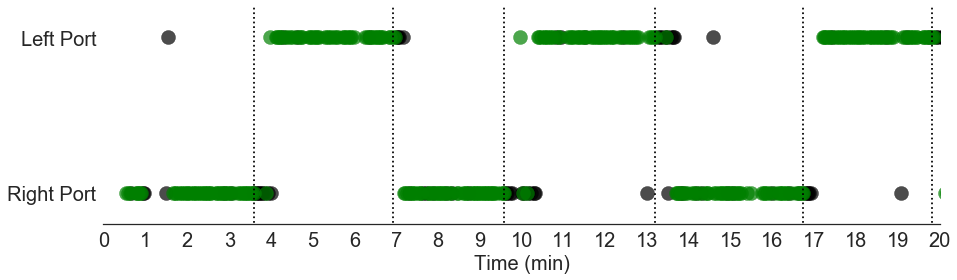

In [17]:
block_start_trials = np.where(np.abs(np.diff(data['Right Reward Prob'].values))!=0)
block_start_times = data['Elapsed Time (s)'].values[block_start_trials[0]]

num_trials = 1600
sns.set_style('white')
plt.figure(figsize=(15,4))
plt.vlines(block_start_times,ymin=0,ymax=3,linestyle='dotted')
plt.scatter(data[data['Reward'] == 0]['Elapsed Time (s)'].values[:num_trials],
            data[data['Reward'] == 0]['Port Poked'].values[:num_trials],color='black',s=200,alpha=0.7)
plt.scatter(data[data['Reward'] == 1]['Elapsed Time (s)'].values[:num_trials],
            data[data['Reward'] == 1]['Port Poked'].values[:num_trials],color='green',s=200,alpha=0.7)
plt.xticks(np.arange(0,1700,60),list(map(int,np.arange(0,1700/60))),fontsize=20)
plt.yticks([1,2],['Right Port','Left Port'],fontsize=20)
plt.xlim(-1,1201)
plt.xlabel('Time (min)',fontsize=20)
plt.ylim(0.8,2.2)
sns.despine(left=True)
#fig_name = '/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/singlesession.eps'
#plt.savefig(fig_name, format='eps', dpi=1000)
print('Green = Reward, Black = No reward')

## looking at individual mice

In [2]:
data90 = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/all_9010_high_processed2.csv',index_col=0)
data80 = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/all_8020_high_processed2.csv',index_col=0)
#data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_7030_02192017.csv',index_col=0)
data90['Condition'] = '90-10'
data80['Condition'] = '80-20'
#data70['Condition'] = '70-30'
datas = data90.append(data80)
#datas = datas.append(data70)

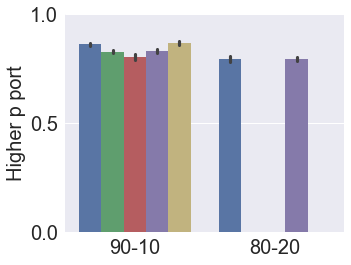

In [3]:
#ax2 = sns.barplot(x='Condition',y='Higher p port',data=datas)
plt.figure(figsize=(5,4))
ax1 = sns.barplot(x='Condition',y='Higher p port',data=datas[datas['Condition'] != '100-0'],hue='Mouse ID')
plt.yticks([0,0.5,1.0],fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Higher p port',fontsize=20)
plt.xlabel('')
ax1.legend_.remove()
sns.despine()

## Comparing conditions

In [4]:
session_ids = np.unique(datas['Session ID'].values)
#session_ids = ['01182017_q43']
block_trials_ = np.array([])
for session in session_ids:
    data = datas[datas['Session ID']==session].copy()
    block_ends = data['Trial'].values[np.where(data['Block Trial'].values==0)[0]]
    
    for trial in data.iterrows():
        try:
            block_trial = block_ends[np.where(block_ends > trial[1]['Trial'])[0][0]] - trial[1]['Block Trial']
        except:
            block_trial = 0
        block_trials_ = np.append(block_trials_,block_trial)

In [5]:
datas['Block Trial Rev'] = block_trials_

In [6]:
block_trials = np.unique(datas['Block Trial'].values)
conditions = np.unique(datas['Condition'].values)
mice = np.unique(datas['Mouse ID'].values)
p = np.zeros((block_trials.shape[0],2))
trial_stats = pd.DataFrame(data=None)
for condition in conditions:
        for i,trial in enumerate(block_trials):
            d = datas[datas['Condition']==condition]
            #d = d[d['Mouse ID']==mouse]
            d = d[d['Block Trial']==trial]
            '''
            boolean = (((datas['Block Trial'] == trial) 
                    & (datas['Condition']==condition))
                    & (datas['Mouse ID'] == mouse))
            
            t = datas[boolean]['Higher p port'].values
            '''
            t = d['Higher p port'].values
            p[i,0] = t.mean()
            p[i,1] = t.std()/np.sqrt(t.shape[0])

            d = {'Condition':condition,'trial':trial,
                 'mean':t.mean(),'sem':t.std()/np.sqrt(t.shape[0]),'n':t.shape[0]}
            trial_stats = trial_stats.append(pd.DataFrame(data=d,index=[0]))

C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.
C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: Mean of empty s

In [7]:
block_trials_rev = np.unique(datas['Block Trial Rev'].values)
conditions = np.unique(datas['Condition'].values)
p = np.zeros((block_trials_rev.shape[0],2))
trial_stats_ = pd.DataFrame(data=None)

In [8]:
for condition in conditions:
    for i,trial in enumerate(block_trials_rev):
        t = datas[((datas['Block Trial Rev'] == trial) 
                   & (datas['Condition']==condition))]['Higher p port'].values
        p[i,0] = t.mean()
        p[i,1] = t.std()/np.sqrt(t.shape[0])
        
        d = {'Condition':condition,'trial':trial,'mean':t.mean(),'sem':t.std()/np.sqrt(t.shape[0]),'n':t.shape[0]}
        trial_stats_ = trial_stats_.append(pd.DataFrame(data=d,index=[0]))
        
trial_stats_['trial'] = trial_stats_['trial']*-1

C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sabatini Lab\Anaconda3\envs\behavior\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of emp

In [9]:
trial_stats = trial_stats[trial_stats['n'] > 30]
trial_stats_ = trial_stats_[trial_stats_['n'] > 30]

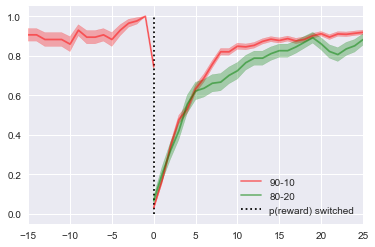

In [10]:
colors = ['red','green']
conditions=['90-10','80-20']

for i,condition in enumerate(conditions):
    trial_stat = trial_stats[trial_stats['Condition']==condition]
    trial_stat_ = trial_stats_[trial_stats_['Condition']==condition]
    u = trial_stat['mean'].values
    e = trial_stat['sem'].values
    x = trial_stat['trial'].values
    
    u_ = trial_stat_['mean'].values
    e_ = trial_stat_['sem'].values
    x_ = trial_stat_['trial'].values
    
    plt.plot(x,u,color=colors[i],alpha=0.5,label=condition)
    plt.fill_between(x,y1=u-e,y2=u+e,color=colors[i],alpha=0.3)
    
    plt.plot(x_,u_,color=colors[i],alpha=0.5)
    plt.fill_between(x_,y1=u_-e_,y2=u_+e_,color=colors[i],alpha=0.3)
    
plt.vlines(x=0,ymin=0,ymax=1,linestyle='dotted',label='p(reward) switched')

plt.xlim(-15,25)
plt.legend(loc='lower right')

([<matplotlib.axis.XTick at 0xadede10>,
 <a list of 3 Text xticklabel objects>)

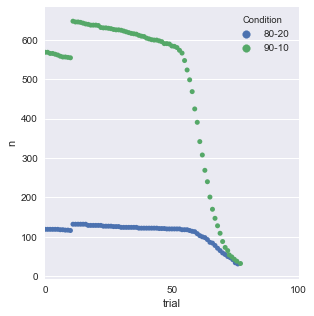

In [11]:
trial_stats = trial_stats[trial_stats['n'] > 30]
trial_stats_ = trial_stats_[trial_stats_['n'] > 30]

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.swarmplot(x='trial',y='n',hue='Condition',data=trial_stats)
plt.xlim(0,100)
plt.xticks([0,50,100],[0,50,100])



## END

In [93]:
conditions = ['90-10','80-20','70-30']
u_avg_ = np.zeros(3)
e_avg_ = np.zeros(3)
for i,condition in enumerate(conditions):
    trials = trial_stats_[((trial_stats_['trial'] > -15) 
                           & (trial_stats_['trial'] < 0)
                           & (trial_stats_['Condition']==condition))]
    
    u_avg_[i] = trials['mean'].mean()
    e_avg_[i] = np.sqrt(np.sum(trials['sem'].values**2) / (trials.shape[0]-1))

In [108]:
np.where(u >= u_avg_[2])

(array([20, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
        75, 76, 77, 78, 79, 80, 81]),)

In [109]:
u

array([ 0.08333333,  0.11044776,  0.2       ,  0.28656716,  0.3742515 ,
        0.43843844,  0.46666667,  0.54545455,  0.56969697,  0.58841463,
        0.6097561 ,  0.68324607,  0.72251309,  0.72703412,  0.72894737,
        0.7414248 ,  0.75661376,  0.77777778,  0.78571429,  0.77718833,
        0.79255319,  0.78666667,  0.784     ,  0.78933333,  0.79946524,
        0.81451613,  0.80913978,  0.81989247,  0.78436658,  0.78706199,
        0.80862534,  0.85945946,  0.85135135,  0.83423913,  0.82336957,
        0.83967391,  0.83423913,  0.82880435,  0.83695652,  0.82336957,
        0.82880435,  0.80706522,  0.82016349,  0.83013699,  0.82692308,
        0.80494505,  0.83471074,  0.84210526,  0.8033241 ,  0.81717452,
        0.85595568,  0.84764543,  0.8551532 ,  0.84636872,  0.84078212,
        0.83753501,  0.85994398,  0.84313725,  0.83146067,  0.86235955,
        0.87640449,  0.86478873,  0.83615819,  0.82152975,  0.83238636,
        0.80626781,  0.8362069 ,  0.81360947,  0.81547619,  0.82

In [58]:
a = np.array(u_.values())

(-1, 3)

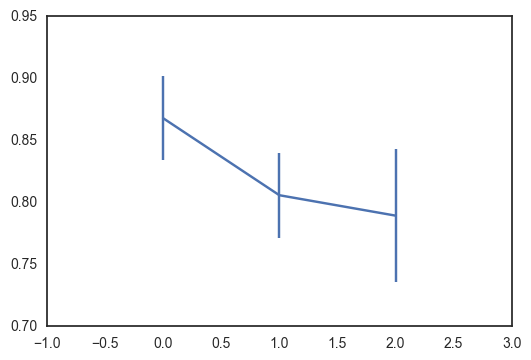

In [91]:
plt.errorbar(x=[0,1,2],y=u_,yerr=e_)
plt.xlim(-1,3)

In [62]:
u_

array([ 0.86995013,  0.80559808,  0.76036858])